# Train Model

#### Check acces to GPU

Let's make sure that we have access to GPU.

In [1]:
!nvidia-smi


Wed Apr 10 00:31:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### Installation

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.6/749.6 kB 6.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

### Connect to google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create yaml file for training




In [4]:
import yaml

In [5]:
# infomation for yaml document
data = {
    'train': '/content/drive/MyDrive/Brain_Tumor_Detection/data/train/images', # path to training images
    'val': '/content/drive/MyDrive/Brain_Tumor_Detection/data/valid/images', #path to validation images

    'nc': 3,
    'names': ['label0', 'label1', 'label2']

}

with open("data.yaml" , "w") as f:
   yaml.dump(data,f,default_flow_style = False)

# save yaml file to google drive
!cp /content/data.yaml /content/drive/MyDrive/Brain_Tumor_Detection/data/data.yaml


Check environment

In [5]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


Train model

In [7]:
#!yolo task=detect mode=train model=/content/drive/MyDrive/Brain_Tumor_Detection/yolov9c.pt  data=/content/drive/MyDrive/Brain_Tumor_Detection/data/data.yaml epochs=200 imgsz=640 batch=16 patience=10 project=/content/drive/MyDrive/Brain_Tumor_Detection/training_results

# comment the code above and uncomment the code below to resume training if notebook is interupted
# Note: you will need to run all the previous lines of code

!yolo task=detect mode=train resume data=/content/drive/MyDrive/Brain_Tumor_Detection/data/data.yaml model=/content/drive/MyDrive/Brain_Tumor_Detection/training_results/train/weights/last.pt

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Brain_Tumor_Detection/training_results/train/weights/last.pt, data=/content/drive/MyDrive/Brain_Tumor_Detection/data/data.yaml, epochs=200, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Brain_Tumor_Detection/training_results, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/Brain_Tumor_Detection/training_results/train/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=

## Validate model

Validate model on unseen data

Create yaml file for validation

In [8]:
# infomation for yaml document
data_validation = {
    'train': '/content/drive/MyDrive/Brain_Tumor_Detection/data/train/images', # path to training images
    'val': '/content/drive/MyDrive/Brain_Tumor_Detection/data/valid/images', #path to validation images

    'nc': 3,
    'names': ['label0', 'label1', 'label2']

}

with open("data_validation.yaml" , "w") as f:
   yaml.dump(data_validation,f,default_flow_style = False)

# save yaml file to google drive
!cp /content/data_validation.yaml /content/drive/MyDrive/Brain_Tumor_Detection/data/data_validation.yaml

In [11]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Brain_Tumor_Detection/training_results/train/weights/best.pt data=/content/drive/MyDrive/Brain_Tumor_Detection/data/data_validation.yaml

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs
val: Scanning /content/drive/MyDrive/Brain_Tumor_Detection/data/valid/labels.cache... 1980 images, 17 backgrounds, 0 corrupt: 100% 1980/1980 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 124/124 [01:25<00:00,  1.45it/s]
                   all       1980       4380      0.921      0.748      0.826      0.592
                label0       1980       1246      0.888      0.693      0.783      0.515
                label1       1980       1944      0.942      0.832      0.887      0.697
                label2       1980       1190      0.932      0.718      0.807      0.565
Speed: 0.3ms preprocess, 27.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
# save validation results to a folder in your Drive with the name validation
!cp -r /content/runs/detect/val /content/drive/MyDrive/Brain_Tumor_Detection/validation_results

Test model

In [13]:
# test using the best weights from the training_results folder
!yolo task=detect mode=predict model=/content/drive/MyDrive/Brain_Tumor_Detection/training_results/train/weights/best.pt conf=0.80 source=/content/drive/MyDrive/Brain_Tumor_Detection/data/test/images save=True

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs

image 1/990 /content/drive/MyDrive/Brain_Tumor_Detection/data/test/images/volume_100_slice_105_jpg.rf.cdacd3f7e2631df9516f8f0283ac430c.jpg: 608x640 (no detections), 159.2ms
image 2/990 /content/drive/MyDrive/Brain_Tumor_Detection/data/test/images/volume_100_slice_47_jpg.rf.5a4036c4db721c7a2501e756d91915a6.jpg: 608x640 1 label1, 48.8ms
image 3/990 /content/drive/MyDrive/Brain_Tumor_Detection/data/test/images/volume_100_slice_48_jpg.rf.7bc34aee05abcdb930d48b8f69044264.jpg: 608x640 (no detections), 48.8ms
image 4/990 /content/drive/MyDrive/Brain_Tumor_Detection/data/test/images/volume_100_slice_51_jpg.rf.2d3a12b0725e8a75d332417714bb2993.jpg: 608x640 1 label0, 1 label1, 1 label2, 48.8ms
image 5/990 /content/drive/MyDrive/Brain_Tumor_Detection/data/test/images/volume_101_slice_43_jpg.rf.964a4159ddac8cf19c2b53dfb0ab013a.jp

In [14]:
# save prediction results to output folder in google drive
!cp -r /content/runs/detect/predict /content/drive/MyDrive/Brain_Tumor_Detection/predictions

# View predictions

In [15]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

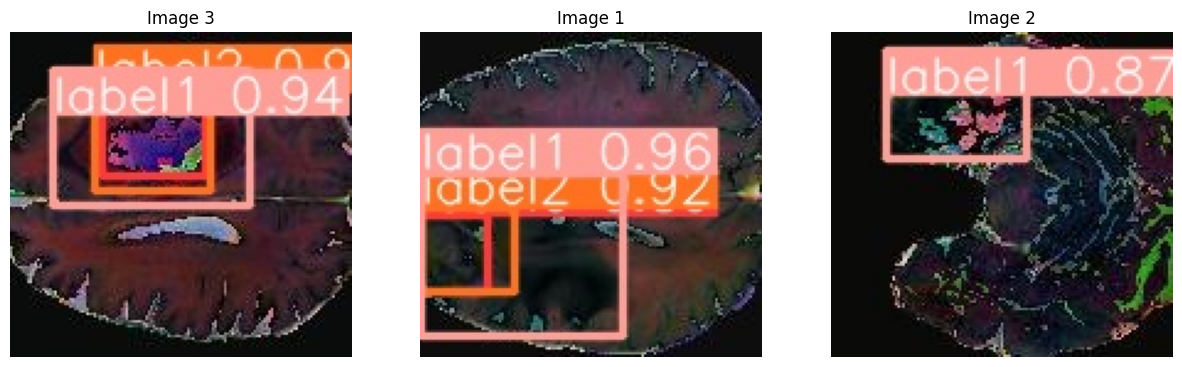

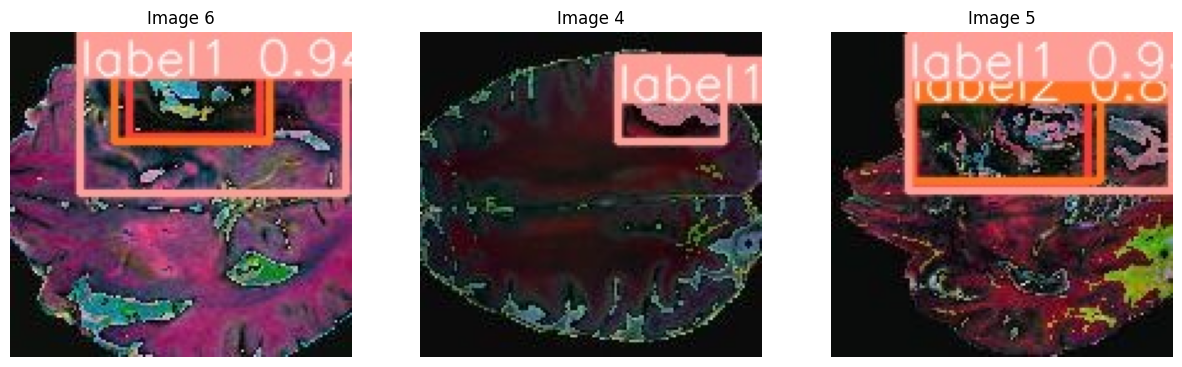

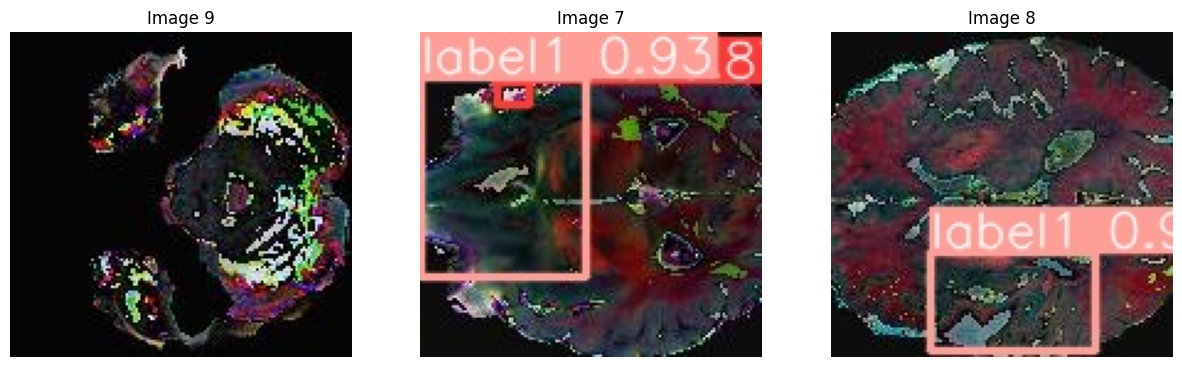

<Figure size 1500x500 with 0 Axes>

In [21]:
# Path to the folder containing images
folder_path = "/content/drive/MyDrive/Brain_Tumor_Detection/predictions"

# Get the list of files in the folder
image_files = os.listdir(folder_path)

# Randomly select 9 images
selected_images = random.sample(image_files, 9)

# Set up the figure with larger size
plt.figure(figsize=(15, 5))

# Plotting images side by side
for i, image_file in enumerate(selected_images, 1):
    image_path = os.path.join(folder_path, image_file)
    image = mpimg.imread(image_path)
    plt.subplot(1, 3, i%3 + 1)
    plt.imshow(image)
    plt.title(f"Image {i}")
    plt.axis('off')
    if i % 3 == 0:
        plt.show()
        plt.figure(figsize=(15, 5))

plt.show()